In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
orders_df=pd.read_csv("zomato.csv")
orders_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
orders_df.shape

(51717, 17)

In [5]:
orders_df.columns.to_list()

['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

In [6]:
#Renaming columns
orders_df.rename(columns={'approx_cost(for two people)' : 'approx_cost','listed_in(city)' : 'area'}, inplace = True)

In [7]:
#DATA CLEANING
#Dropping irrelevant columns
#here url,address,menu_item,reviews_list,dish_liked,phone,listed_in(type) are irrelavent for problem solution
orders_df.drop(['url','address','menu_item','reviews_list','dish_liked','phone','listed_in(type)'], axis=1 , inplace=True )
orders_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Banashankari


In [8]:
#checking and handling the Datatypes
#Checking the types of data present in dataset
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   online_order  51717 non-null  object
 2   book_table    51717 non-null  object
 3   rate          43942 non-null  object
 4   votes         51717 non-null  int64 
 5   location      51696 non-null  object
 6   rest_type     51490 non-null  object
 7   cuisines      51672 non-null  object
 8   approx_cost   51371 non-null  object
 9   area          51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [9]:
#checking the unique values in rate column of dataset
orders_df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
#above result shows there are many null values and garbage values also
#replacing all null values and garbage values and making it to be converted into numbers
orders_df['rate'] = orders_df['rate'].str.replace("/5", " ")
orders_df['rate'] = orders_df['rate'].str.replace("nan", "NaN")
orders_df['rate'] = orders_df['rate'].str.replace("NEW" , "NaN")
orders_df['rate'] = orders_df['rate'].str.replace("-" ,"NaN")
orders_df['rate'] = orders_df['rate'].str.replace(" /5", "")
orders_df['rate'] = orders_df['rate'].fillna(np.nan)
orders_df['rate'] = orders_df['rate'].str.replace(" "," ")

In [11]:
#verifying results
orders_df['rate'].unique()

array(['4.1 ', '3.8 ', '3.7 ', '3.6 ', '4.6 ', '4.0 ', '4.2 ', '3.9 ',
       '3.1 ', '3.0 ', '3.2 ', '3.3 ', '2.8 ', '4.4 ', '4.3 ', 'NaN',
       '2.9 ', '3.5 ', nan, '2.6 ', '3.8  ', '3.4 ', '4.5 ', '2.5 ',
       '2.7 ', '4.7 ', '2.4 ', '2.2 ', '2.3 ', '3.4  ', '3.6  ', '4.8 ',
       '3.9  ', '4.2  ', '4.0  ', '4.1  ', '3.7  ', '3.1  ', '2.9  ',
       '3.3  ', '2.8  ', '3.5  ', '2.7  ', '2.5  ', '3.2  ', '2.6  ',
       '4.5  ', '4.3  ', '4.4  ', '4.9 ', '2.1 ', '2.0 ', '1.8 ', '4.6  ',
       '4.9  ', '3.0  ', '4.8  ', '2.3  ', '4.7  ', '2.4  ', '2.1  ',
       '2.2  ', '2.0  ', '1.8  '], dtype=object)

In [12]:
#changing datatype of rate column from object to float
orders_df['rate'] = orders_df['rate'].astype(float)

In [13]:
#checking unique values in approx cost column of dataset
orders_df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [14]:
#replacing null values and make it able to convert 
orders_df['approx_cost'] = orders_df['approx_cost'].str.replace("nan" , "NaN")
orders_df['approx_cost'] = orders_df['approx_cost'].fillna('NaN')
orders_df['approx_cost'] = orders_df['approx_cost'].str.replace("," , "")

In [15]:
#verifying the results
orders_df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'NaN', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [16]:
#changing datatype of column from object to float
orders_df['approx_cost'] = orders_df['approx_cost'].astype(float)

In [17]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          41665 non-null  float64
 4   votes         51717 non-null  int64  
 5   location      51696 non-null  object 
 6   rest_type     51490 non-null  object 
 7   cuisines      51672 non-null  object 
 8   approx_cost   51371 non-null  float64
 9   area          51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB


In [18]:
#checking the number of null values columnwise
orders_df.isna().sum()

name                0
online_order        0
book_table          0
rate            10052
votes               0
location           21
rest_type         227
cuisines           45
approx_cost       346
area                0
dtype: int64

In [19]:
#checking of percentage of null values in each column
(orders_df.isna().sum() / orders_df.shape[0]) * 100

name             0.000000
online_order     0.000000
book_table       0.000000
rate            19.436549
votes            0.000000
location         0.040606
rest_type        0.438927
cuisines         0.087012
approx_cost      0.669026
area             0.000000
dtype: float64

In [20]:
#we dropping null values from columns having lesser number of null values
orders_df = orders_df[orders_df["location"].notna()]
orders_df = orders_df[orders_df["rest_type"].notna()]
orders_df = orders_df[orders_df["cuisines"].notna()]
orders_df = orders_df[orders_df["approx_cost"].notna()]

#verifying results
orders_df.isna().sum()


name               0
online_order       0
book_table         0
rate            9885
votes              0
location           0
rest_type          0
cuisines           0
approx_cost        0
area               0
dtype: int64

In [21]:
#rate columns consists of huge null values but dropping this column leads to large amount of data.so,instead of dropping it ,we will impute with either mean,mode or median
#checking all statistics of rate column
orders_df['rate'].describe()

count    41263.000000
mean         3.702011
std          0.439985
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

In [22]:
#impoting null values with median of rate column
orders_df['rate'] = orders_df['rate'].fillna(orders_df['rate'].median())
orders_df.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
approx_cost     0
area            0
dtype: int64

In [23]:
#now after dropping  values we will rest the index
orders_df.reset_index(inplace=True)
orders_df.drop(['index'],axis=1,inplace=True)

## Data visualization

#### No.of orders vs Restaurants

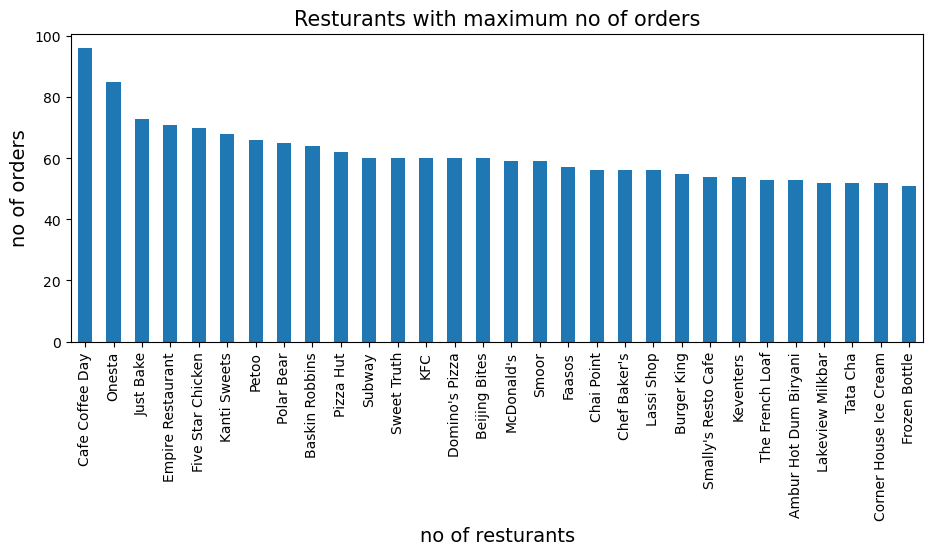

In [24]:
#checking for restaurants got higher orders
plt.figure(figsize= (11,4))
data = orders_df['name'].value_counts()[ : 30]
data.plot(kind='bar')
plt.xlabel('no of resturants',size= 14)
plt.ylabel('no of orders' , size = 14)
plt.title("Resturants with maximum no of orders", fontsize=15)
plt.show()

#### Above graph shows that Cafe coffee Day and onesta got slightly higher number of orders as compared to others restaurants while others got approximatley same number of orders.

### Number of Restaurants having online order facility

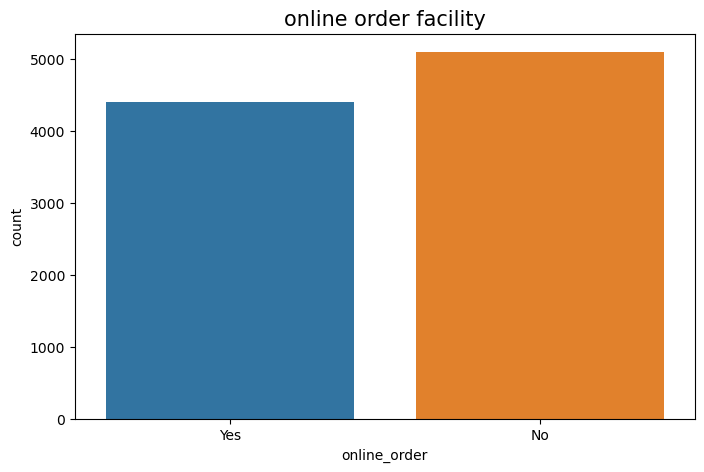

In [26]:
#checking no of resturants having online order facility
data = orders_df[['name' , 'online_order']].drop_duplicates()
plt.figure(figsize = (8,5))
ax= sns.countplot(x='online_order',data=data).set_title('online order facility',fontsize= 15)
plt.show()

####  From above chart, we can see only 4397 restaurants in Banglore have Online order facility which lessthan half of restaurants.

### Number of restaurants having prebooking Table facility

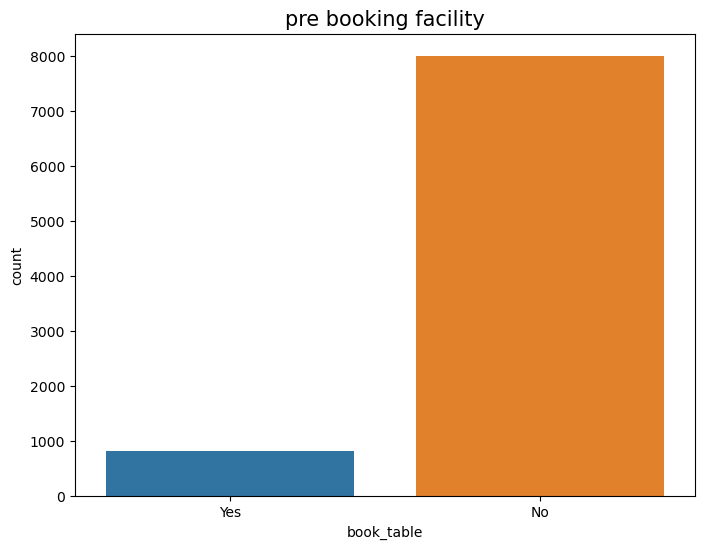

In [27]:
#checking number of restaurants having prebooking table facility
data = orders_df[['name' ,'book_table']].drop_duplicates()
plt.figure(figsize = (8,6))
ax = sns.countplot(x="book_table",data=data).set_title('pre booking facility', fontsize =15)
plt.show()

#### we can see Most of the restaurants in Banglore doesn't have Pre Booking Facility  which is about 8011 , only 820 restaurants having these facility.

# Most common Ratings for orders

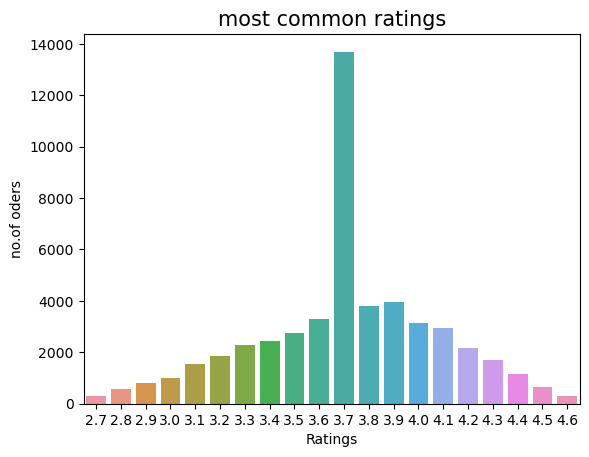

In [29]:
#checking most common ratings for orders
data = orders_df.rate.value_counts().reset_index()[0:20]
sns.barplot(x= data['rate'] , y= data['count'])
plt.xlabel('Ratings')
plt.ylabel('no.of oders')
plt.title('most common ratings',size =15)
plt.show()

#### we can see maximum number of orders got the 3.7 rating for restaurants

## Encoding columns

In [30]:
#online order column
orders_df['online_order']= orders_df['online_order'].replace({"Yes": 1 ,"No" :0})
#Book_table column
orders_df['book_table']= orders_df['book_table'].replace({"Yes": 1 ,"No" :0})
orders_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


In [31]:
#label encode the categorical variables to make it easier to build algorithm

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [32]:
orders_df.location = le.fit_transform(orders_df.location )
orders_df.rest_type = le.fit_transform(orders_df.rest_type )
orders_df.cuisines = le.fit_transform(orders_df.cuisines )
orders_df.area = le.fit_transform(orders_df.area )

In [33]:
orders_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,1,1,4.1,775,1,27,2145,800.0,1
1,Spice Elephant,1,0,4.1,787,1,27,947,800.0,1
2,San Churro Cafe,1,0,3.8,918,1,22,761,800.0,1
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,78,2539,300.0,1
4,Grand Village,0,0,3.8,166,4,27,2174,600.0,1


### Feature selection

In [34]:
#input features
x=orders_df.iloc[ : ,[1,2,4,5,6,7,8,9]]
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,approx_cost,area
0,1,1,775,1,27,2145,800.0,1
1,1,0,787,1,27,947,800.0,1
2,1,0,918,1,22,761,800.0,1
3,0,0,88,1,78,2539,300.0,1
4,0,0,166,4,27,2174,600.0,1


In [35]:
#output feature
y=orders_df['rate']
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51143    3.6
51144    3.7
51145    3.7
51146    4.3
51147    3.4
Name: rate, Length: 51148, dtype: float64

In [36]:
#splitting dataset into testing and training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)

##### Importing ML models 

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

######   Linear Regression

In [38]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)


LinearRegression()

In [39]:
y_lr= lr_model.predict(x_test)
y_lr[ :50]

array([3.63085761, 3.56381298, 3.9618806 , 3.68402402, 3.99816324,
       3.60206294, 3.69532667, 3.67552471, 3.56597602, 3.71460543,
       3.61016227, 3.58570745, 3.56473534, 3.54688692, 3.68417832,
       3.55341661, 3.62646607, 3.59564685, 3.8529658 , 4.30991288,
       3.66864408, 3.75584845, 3.58625548, 3.74172024, 4.11181838,
       3.63859085, 3.6506041 , 3.67659178, 3.60030849, 3.68442236,
       3.64210635, 3.56174045, 3.5718062 , 3.66624301, 3.56332163,
       3.65907097, 3.63870595, 3.54042742, 3.66979948, 3.54315803,
       3.57621927, 3.53553971, 4.11942052, 3.64719674, 4.12921011,
       3.58125654, 3.58920804, 3.58100867, 4.45947823, 3.53702084])

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [41]:
#metrics for linear regression

mae1 = mean_absolute_error(y_test,y_lr)
mse1 = mean_squared_error(y_test,y_lr)
r2score1 =r2_score(y_test,y_lr)
print("mean absolute error:",mae1)
print("mean squared error:" ,mse1)
print("Accuracy of model")
print("r2 score:" ,r2score1)

mean absolute error: 0.2536570786323493
mean squared error: 0.11519452327277957
Accuracy of model
r2 score: 0.2666037154845199


#### Decision Tree Regressor

In [42]:
d_tree = DecisionTreeRegressor()
d_tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [43]:
y_dt= d_tree.predict(x_test)
y_dt[ :50]

array([3.5, 3.8, 3.7, 4. , 4.3, 3.5, 3.8, 4. , 3.8, 3.5, 2.8, 3.4, 3.4,
       3.7, 2.8, 3.7, 3.9, 3.3, 4.3, 4.4, 3.7, 3.9, 3.7, 3.7, 4.3, 2.8,
       3.7, 2.4, 3.5, 3.7, 3.7, 3.3, 3.7, 3.9, 3.6, 4.1, 3.1, 3.7, 4.2,
       3.7, 3.3, 3.5, 4.1, 3.7, 4.2, 3.7, 3.7, 3.6, 4.2, 3.3])

In [44]:
#metrics for DecisionTreeregressor

mae2 = mean_absolute_error(y_test,y_dt)
mse2 = mean_squared_error(y_test,y_dt)
r2score2 =r2_score(y_test,y_dt)
print("mean absolute error:",mae2)
print("mean squared error:" ,mse2)
print("Accuracy of model")
print("r2 score:" ,r2score2)

mean absolute error: 0.04320625610949218
mean squared error: 0.026849679591615074
Accuracy of model
r2 score: 0.8290591020000802


#### Random Forest 

In [45]:
rf=RandomForestRegressor(n_estimators=35 ,random_state=0)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=35, random_state=0)

In [46]:
y_rf = rf.predict(x_test)
y_rf[ :50]

array([3.51142857, 3.78857143, 3.72285714, 3.72571429, 4.26285714,
       3.47714286, 3.79714286, 3.90857143, 3.77428571, 3.46285714,
       2.88      , 3.38571429, 3.36857143, 3.7       , 2.98285714,
       3.7       , 3.86      , 3.53714286, 4.28571429, 4.37428571,
       3.7       , 3.89571429, 3.7       , 3.82571429, 4.3       ,
       2.97142857, 3.7       , 3.37714286, 3.47142857, 3.7       ,
       3.7       , 3.27428571, 3.7       , 3.90571429, 3.50571429,
       3.91142857, 3.28857143, 3.7       , 4.07142857, 3.7       ,
       3.28857143, 3.34857143, 4.1       , 3.67142857, 4.17428571,
       3.7       , 3.7       , 3.57142857, 4.34285714, 3.24285714])

In [47]:
#metrics for random forest regressor
mae3 = mean_absolute_error(y_test,y_rf)
mse3= mean_squared_error(y_test,y_rf)
r2score3 =r2_score(y_test,y_rf)
print("mean absolute error:",mae3)
print("mean squared error:" ,mse3)
print("Accuracy of model")
print("r2 score:" ,r2score3)

mean absolute error: 0.05661555499536694
mean squared error: 0.016319249121737826
Accuracy of model
r2 score: 0.8961020339168053


### Extra Tree Regressor

In [49]:
Et = ExtraTreesRegressor(n_estimators=120)
Et.fit(x_train,y_train)


ExtraTreesRegressor(n_estimators=120)

In [50]:
y_pred = Et.predict(x_test)
y_pred[:50]

array([3.5       , 3.7825    , 3.71583333, 3.95416667, 4.3       ,
       3.44333333, 3.8       , 3.93583333, 3.74583333, 3.495     ,
       2.8       , 3.39833333, 3.4       , 3.7       , 2.8       ,
       3.7       , 3.9       , 3.56666667, 4.3       , 4.4       ,
       3.69666667, 3.90583333, 3.7       , 3.885     , 4.3       ,
       2.8       , 3.7       , 3.65666667, 3.5       , 3.7       ,
       3.7       , 3.3       , 3.7       , 3.9       , 3.6       ,
       4.02916667, 3.12666667, 3.7       , 4.1275    , 3.7       ,
       3.265     , 3.39833333, 4.105     , 3.7       , 4.18      ,
       3.7       , 3.7       , 3.56791667, 4.42416667, 3.21666667])

In [51]:
#metrics for Extra tree regressor
mae4 = mean_absolute_error(y_test,y_pred)
mse4= mean_squared_error(y_test,y_pred)
r2score4 =r2_score(y_test,y_pred)
print("mean absolute error:",mae4)
print("mean squared error:" ,mse4)
print("Accuracy of model")
print("r2 score:" ,r2score4)

mean absolute error: 0.035887368306726994
mean squared error: 0.011899276259584082
Accuracy of model
r2 score: 0.9242421883500742


In [52]:
# saving model by using pickle
import pickle
with open('model_pickle','wb') as f:
    pickle.dump(Et,f)